<a href="https://colab.research.google.com/github/Aman123307/Aman-Arora-123/blob/main/mental_health_burnout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# All the libraries that can be required in this project
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import kagglehub
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Downloading the dataset
path = kagglehub.dataset_download("khushikyad001/mental-health-and-burnout-in-the-workplace")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mental-health-and-burnout-in-the-workplace


In [ ]:
 # Storing the dataset in variable
Mental_health_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Mental_health_project.zip')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This is the dataset
Mental_health_data

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3996,28,Female,Brazil,Marketing Manager,Sales,18,46,No,2.86,...,4,Yes,6.97,No,1,80K-100K,7.71,21,7.70,0
2996,3997,24,Male,Brazil,Customer Support,Marketing,14,31,No,2.43,...,1,Yes,5.58,Yes,0,60K-80K,3.76,2,2.59,0
2997,3998,22,Female,Canada,Marketing Manager,Marketing,0,38,No,6.87,...,25,No,3.81,No,0,40K-60K,3.03,2,6.95,0
2998,3999,57,Non-binary,Australia,Data Scientist,HR,2,41,No,3.62,...,24,No,9.72,No,3,100K+,6.02,37,9.06,0


In [ ]:
# Using head function to inspect the starting data
Mental_health_data.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [ ]:
# Using tail function to inspect the ending data
Mental_health_data.tail()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
2995,3996,28,Female,Brazil,Marketing Manager,Sales,18,46,No,2.86,...,4,Yes,6.97,No,1,80K-100K,7.71,21,7.70,0
2996,3997,24,Male,Brazil,Customer Support,Marketing,14,31,No,2.43,...,1,Yes,5.58,Yes,0,60K-80K,3.76,2,2.59,0
2997,3998,22,Female,Canada,Marketing Manager,Marketing,0,38,No,6.87,...,25,No,3.81,No,0,40K-60K,3.03,2,6.95,0
2998,3999,57,Non-binary,Australia,Data Scientist,HR,2,41,No,3.62,...,24,No,9.72,No,3,100K+,6.02,37,9.06,0
2999,4000,46,Non-binary,India,Software Engineer,IT,17,48,No,9.77,...,49,No,8.21,No,7,60K-80K,7.89,37,1.09,1


In [ ]:
# Fetching the info about null or non-null values and about the datatypes
Mental_health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  PhysicalActivityHrs     3000 non-null   

In [ ]:
# Took a random sample to inspect data more precisely like we got to know that there is a 4th gender "Prefer not to say"
Mental_health_data.sample(10)

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
13,1014,23,Prefer not to say,India,IT Admin,Sales,0,50,Yes,2.43,...,106,No,8.56,Yes,5,60K-80K,8.24,3,2.33,0
878,1879,27,Male,Brazil,Sales Associate,Support,14,53,Yes,7.63,...,41,No,7.46,No,1,60K-80K,6.52,43,9.33,1
1949,2950,51,Prefer not to say,Canada,Data Scientist,HR,2,31,No,5.27,...,105,Yes,8.31,Yes,2,40K-60K,7.24,38,1.22,0
2669,3670,42,Non-binary,Germany,Sales Associate,Marketing,15,35,Yes,2.60,...,74,No,9.75,Yes,2,100K+,4.15,27,9.25,0
703,1704,26,Non-binary,Brazil,HR Specialist,Sales,5,58,No,1.93,...,78,No,3.61,Yes,2,100K+,7.52,1,4.48,0
2739,3740,30,Prefer not to say,Brazil,Sales Associate,Marketing,20,52,Hybrid,2.47,...,69,Yes,9.91,No,2,100K+,8.78,40,9.21,0
2777,3778,49,Non-binary,India,Software Engineer,IT,0,54,Yes,5.16,...,17,No,3.07,Yes,6,100K+,4.03,11,6.95,0
640,1641,51,Non-binary,USA,Customer Support,IT,3,58,Yes,3.16,...,55,No,4.52,Yes,8,40K-60K,3.53,19,2.11,0
1037,2038,54,Female,USA,Project Manager,Support,16,31,Hybrid,8.34,...,27,Yes,3.04,Yes,6,100K+,7.01,24,4.58,1
2264,3265,46,Prefer not to say,Germany,Sales Associate,Marketing,7,38,No,8.07,...,41,No,9.86,No,5,80K-100K,4.01,17,6.83,1


In [ ]:
# Used describe function that gave us the mean, S.D of columns having numerical values
Mental_health_data.describe(include='all')

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
count,3000.000000,3000.000000,3000,3000,3000,3000,3000.000000,3000.000000,3000,3000.000000,...,3000.000000,3000,3000.00000,3000,3000.000000,3000,3000.000000,3000.00000,3000.000000,3000.000000
unique,NaN,NaN,4,7,8,6,NaN,NaN,3,NaN,...,NaN,2,NaN,2,NaN,5,NaN,NaN,NaN,NaN
top,NaN,NaN,Non-binary,India,Data Scientist,HR,NaN,NaN,Hybrid,NaN,...,NaN,No,NaN,No,NaN,100K+,NaN,NaN,NaN,NaN
freq,NaN,NaN,757,464,411,525,NaN,NaN,1022,NaN,...,NaN,1531,NaN,1511,NaN,640,NaN,NaN,NaN,NaN
mean,2500.500000,40.805667,NaN,NaN,NaN,NaN,10.099333,44.504000,NaN,5.509137,...,59.227000,NaN,5.44254,NaN,4.544667,NaN,5.450950,25.20100,5.520680,0.326667
std,866.169729,11.011705,NaN,NaN,NaN,NaN,6.035032,8.491526,NaN,2.574072,...,34.809779,NaN,2.59740,NaN,2.854129,NaN,2.602379,14.08645,2.566861,0.469072
min,1001.000000,22.000000,NaN,NaN,NaN,NaN,0.000000,30.000000,NaN,1.000000,...,0.000000,NaN,1.00000,NaN,0.000000,NaN,1.000000,1.00000,1.000000,0.000000
25%,1750.750000,31.000000,NaN,NaN,NaN,NaN,5.000000,37.000000,NaN,3.300000,...,29.000000,NaN,3.16000,NaN,2.000000,NaN,3.160000,13.00000,3.300000,0.000000
50%,2500.500000,41.000000,NaN,NaN,NaN,NaN,10.000000,45.000000,NaN,5.480000,...,59.000000,NaN,5.44000,NaN,5.000000,NaN,5.425000,25.00000,5.580000,0.000000
75%,3250.250000,50.000000,NaN,NaN,NaN,NaN,15.000000,52.000000,NaN,7.640000,...,90.000000,NaN,7.69000,NaN,7.000000,NaN,7.730000,37.00000,7.642500,1.000000


In [ ]:
# Reassured that there is no null value in the dataset using isnull function
Mental_health_data.isnull().sum()

,0
EmployeeID,0
Age,0
Gender,0
Country,0
JobRole,0
Department,0
YearsAtCompany,0
WorkHoursPerWeek,0
RemoteWork,0
BurnoutLevel,0


In [ ]:
# Dropped variables which are not relevant to predict whether someone has a risk of Burnout or not
Mental_health_data.drop(['EmployeeID', 'Country', 'JobRole', 'Department'],axis=1, inplace=True)

Text(0, 0.5, 'BurnoutRisk')

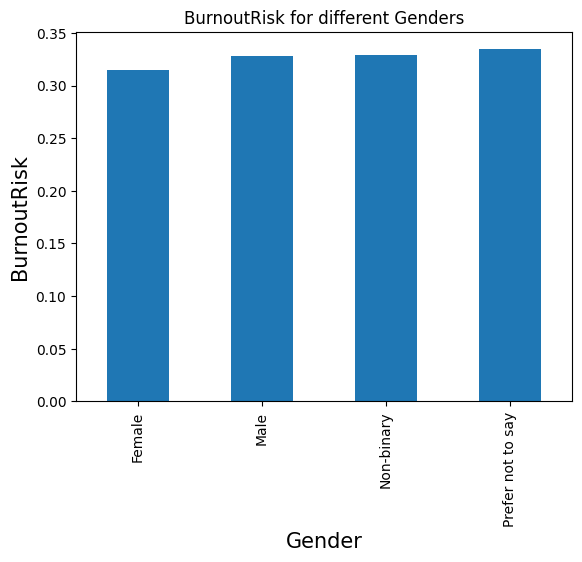

In [ ]:
# Bar graph for BurnoutRisk for different Genders
Ax=Mental_health_data.groupby(['Gender'])['BurnoutRisk'].mean().plot.bar()
figsize=(10,5)
fontsize=14

Ax.set_title("BurnoutRisk for different Genders", fontsize=12)

Ax.set_xlabel("Gender",fontsize=15)
Ax.set_ylabel("BurnoutRisk",fontsize=15)

Text(0, 0.5, 'BurnoutRisk')

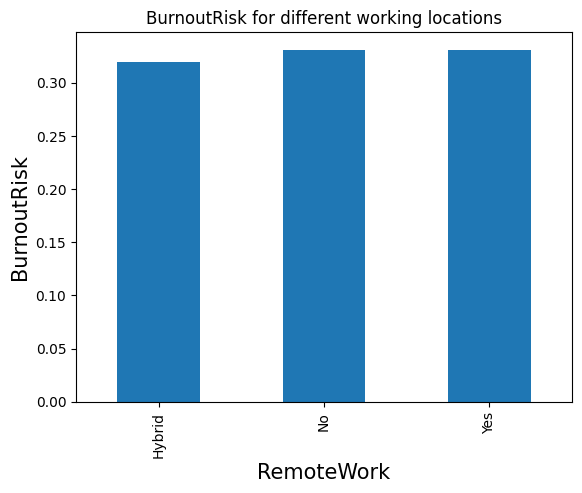

In [ ]:
# Bar graph for BurnoutRisk for different working locations
Ax=Mental_health_data.groupby(['RemoteWork'])['BurnoutRisk'].mean().plot.bar()
figsize=(10,5)
fontsize=14

Ax.set_title("BurnoutRisk for different working locations", fontsize=12)

Ax.set_xlabel("RemoteWork",fontsize=15)
Ax.set_ylabel("BurnoutRisk",fontsize=15)

Text(0, 0.5, '')

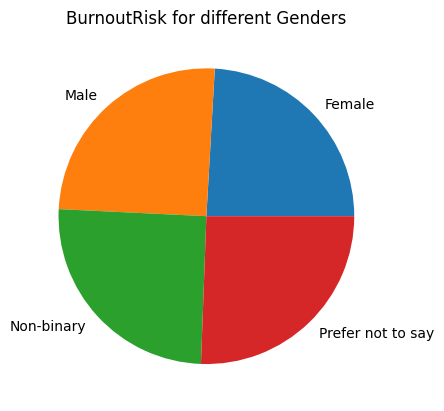

In [ ]:
# Pie chart for BurnoutRisk for different Genders
Ax=Mental_health_data.groupby(['Gender'])['BurnoutRisk'].mean().plot.pie()
figsize=(10,5)
fontsize=14

Ax.set_title("BurnoutRisk for different Genders", fontsize=12)

Ax.set_ylabel("",fontsize=15)

In [ ]:
# Used label encoding to encode the categorical data into numerical values like 0's and 1's
#                                   0          1          2              3
# Encoded_Gender                  Female      Male    non-binary  Prefer not to say
# Encoded_Remote_Work               No        Yes       Hybrid           -
# Encoded_Therapy_Access            No        Yes         -              -
# Encodes_MentalHealth_Support      No        Yes         -              -
# Dropped the real categorical variable like Gender, RemoteWork etc.

Mental_health_data['Encoded_gender']=Mental_health_data['Gender'].apply(lambda x:1 if x=='Male' else(0 if x=='Female' else(2 if x=='Non-binary' else 3) ))
Mental_health_data.drop('Gender',axis=1, inplace=True)

Mental_health_data['Encoded_Remote_Work']=Mental_health_data['RemoteWork'].apply(lambda x:1 if x=='Yes' else(0 if x=='No' else 2))
Mental_health_data.drop('RemoteWork',axis=1, inplace=True)

Mental_health_data['Encoded_Therapy_Access']=Mental_health_data['HasTherapyAccess'].apply(lambda x:1 if x=='Yes' else 0)
Mental_health_data.drop('HasTherapyAccess',axis=1, inplace=True)

Mental_health_data['Encoded_MentalHealth_Support']=Mental_health_data['HasMentalHealthSupport'].apply(lambda x:1 if x=='Yes' else 0)
Mental_health_data.drop('HasMentalHealthSupport',axis=1, inplace=True)

Mental_health_data

,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,CommuteTime,...,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk,Encoded_gender,Encoded_Remote_Work,Encoded_Therapy_Access,Encoded_MentalHealth_Support
0,50,14,47,3.37,5.06,9.47,4.16,7.0,7.9,117,...,8,40K-60K,8.82,6,9.20,0,1,0,1,0
1,36,1,59,7.39,2.00,5.65,3.74,7.2,9.0,8,...,4,80K-100K,2.80,45,8.46,1,1,2,1,1
2,29,13,59,7.10,7.17,5.70,8.80,5.2,9.7,75,...,6,80K-100K,7.28,7,7.96,1,2,2,0,0
3,42,15,31,4.18,3.76,6.40,4.69,8.7,5.8,43,...,9,60K-80K,1.31,11,8.90,0,1,1,1,1
4,40,6,34,8.28,2.34,3.41,2.12,4.2,3.3,58,...,6,<40K,1.17,18,8.88,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,28,18,46,2.86,5.18,4.98,3.46,5.8,8.6,4,...,1,80K-100K,7.71,21,7.70,0,0,0,0,1
2996,24,14,31,2.43,3.68,3.47,6.99,4.9,1.4,1,...,0,60K-80K,3.76,2,2.59,0,1,0,1,1
2997,22,0,38,6.87,7.53,2.19,2.32,7.6,8.5,25,...,0,40K-60K,3.03,2,6.95,0,0,0,0,0
2998,57,2,41,3.62,9.21,9.50,7.07,8.4,0.2,24,...,3,100K+,6.02,37,9.06,0,2,0,0,0


In [ ]:
# Created a user-defined function "salary_converter" to convert the salary from 'K' form to numerical value like 10k to 10000
# Also used this function to take the mean of the salary where Range of salary is given like for example:-
# Salary- 40000-60000-> Mean salary= (40000+60000)/2= 50000
def salary_converter(salary):
  if '<' in salary:
    val_01=int(salary.replace('<', '').replace('K', ''))*1000-1.0
    return f"{val_01}"
  elif '-' in salary:
    val_02=int(salary.split('-')[0].replace('K', ''))*1000
    val_03=int(salary.split('-')[1].replace('K', ''))*1000
    Mean_salary=(val_02+val_03)/2
    return f"{Mean_salary}"
  else:
    val_05=int(salary.replace('K', '').replace('+',''))*1000+1.0
    return f"{val_05}"

# Used 'Apply' function to apply the user defined function in the DataFrame and dropped the "SalaryRange" column
Mental_health_data['Salary']=Mental_health_data['SalaryRange'].apply(salary_converter)
Mental_health_data.drop('SalaryRange',axis=1, inplace=True)
Mental_health_data

,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,CommuteTime,...,MentalHealthDaysOff,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk,Encoded_gender,Encoded_Remote_Work,Encoded_Therapy_Access,Encoded_MentalHealth_Support,Salary
0,50,14,47,3.37,5.06,9.47,4.16,7.0,7.9,117,...,8,8.82,6,9.20,0,1,0,1,0,50000.0
1,36,1,59,7.39,2.00,5.65,3.74,7.2,9.0,8,...,4,2.80,45,8.46,1,1,2,1,1,90000.0
2,29,13,59,7.10,7.17,5.70,8.80,5.2,9.7,75,...,6,7.28,7,7.96,1,2,2,0,0,90000.0
3,42,15,31,4.18,3.76,6.40,4.69,8.7,5.8,43,...,9,1.31,11,8.90,0,1,1,1,1,70000.0
4,40,6,34,8.28,2.34,3.41,2.12,4.2,3.3,58,...,6,1.17,18,8.88,1,1,1,1,1,39999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,28,18,46,2.86,5.18,4.98,3.46,5.8,8.6,4,...,1,7.71,21,7.70,0,0,0,0,1,90000.0
2996,24,14,31,2.43,3.68,3.47,6.99,4.9,1.4,1,...,0,3.76,2,2.59,0,1,0,1,1,70000.0
2997,22,0,38,6.87,7.53,2.19,2.32,7.6,8.5,25,...,0,3.03,2,6.95,0,0,0,0,0,50000.0
2998,57,2,41,3.62,9.21,9.50,7.07,8.4,0.2,24,...,3,6.02,37,9.06,0,2,0,0,0,100001.0


In [ ]:
# As the 'Salary' column contains string representations of floating-point numbers (e.g., '50000.0'), which cannot be
#directly converted to integers. Therefore, we converted it to a float first, and then to an integer.

Mental_health_data['Salary'] = Mental_health_data['Salary'].astype(float).astype(int)

In [ ]:
# Checked the minimun salary
Mental_health_data['Salary'].min()

39999

In [ ]:
# Checked the maximum salary
Mental_health_data['Salary'].max()

100001

In [ ]:
# Created variable 'x' which contains all the dependent variable and 'y' which contains all the independent variables
x=Mental_health_data.drop('BurnoutRisk',axis=1)
y=Mental_health_data['BurnoutRisk']

In [ ]:
# Splitting the data for Training and Testing Purpose in 80:20 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# Results of Train test split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 20)
(600, 20)
(2400,)
(600,)


In [ ]:
# Using MinMaxScaler to scale different columns having different range of values to one common range increasing the Testing accuracy
# from 95.5% to 98.83% for less number of iterations
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
# Using LogisticRegression to create the model to predict whether a person will have Burnout Risk or not
Health_model=LogisticRegression(fit_intercept=True, max_iter=1000)
Health_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Weights calculated by machine
Health_model.coef_

array([[-3.99731256e-02,  2.38501771e-02,  1.86962829e-01,
         1.55256523e+01,  1.41635585e-01,  2.29125023e-02,
         1.61849147e-01, -2.35849437e-01,  1.31777544e-01,
        -3.01639741e-03, -1.58800603e-02,  9.06701827e-02,
        -2.58355698e-02,  1.94313151e-01, -5.45958969e-02,
         3.34923588e-01, -1.41823279e-01,  1.18618543e-02,
        -8.50648147e-03, -2.53974709e-02]])

In [ ]:
# Intercept calculated by the machine
Health_model.intercept_

array([-10.76759352])

In [ ]:
# Getting Probability output values for Train and Testing data
train_pred_proba=Health_model.predict_proba(x_train)
test_pred_proba=Health_model.predict_proba(x_test)

In [ ]:
# Training data probability prediction
train_pred_proba

array([[2.53973366e-02, 9.74602663e-01],
       [9.97723815e-01, 2.27618495e-03],
       [9.95236594e-01, 4.76340625e-03],
       ...,
       [3.95522478e-02, 9.60447752e-01],
       [9.99659611e-01, 3.40389317e-04],
       [8.66726031e-03, 9.91332740e-01]])

In [ ]:
# Testing data probability prediction
test_pred_proba

array([[0.21030789, 0.78969211],
       [0.48581279, 0.51418721],
       [0.00888434, 0.99111566],
       ...,
       [0.01543998, 0.98456002],
       [0.04843386, 0.95156614],
       [0.31061525, 0.68938475]])

In [ ]:
# Training and Testing data prediction output not in terms of probability
y_train_pred=Health_model.predict(x_train)
y_test_pred=Health_model.predict(x_test)

In [ ]:
# Training data prediction result
y_train_pred

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
# Testing data prediction result
y_test_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [ ]:
# Finding accuracy for the results obtained
train_accuracy=accuracy_score(y_train,y_train_pred)
test_accuracy=accuracy_score(y_test,y_test_pred)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.99125
Test Accuracy: 0.9883333333333333


In [ ]:
# Finding Errors
mae_error=mean_absolute_error(y_test,y_test_pred)
mse_error=mean_squared_error(y_test,y_test_pred)
rmse_error=math.sqrt(mse_error)

In [ ]:
# Error Values
print(mae_error)
print(mse_error)
print(rmse_error)

0.011666666666666667
0.011666666666666667
0.10801234497346433


In [ ]:
# Finding Prescision score for the results obtained
train_pre=precision_score(y_train,y_train_pred)
test_pre=precision_score(y_test,y_test_pred)
print(f"Train Precision: {train_pre}")
print(f"Test Precision: {test_pre}")

Train Precision: 0.9833333333333333
Test Precision: 0.9900990099009901


In [ ]:
# # Finding Recall score for the results obtained
train_re=recall_score(y_train,y_train_pred)
test_re=recall_score(y_test,y_test_pred)
print(f"Train Recall: {train_re}")
print(f"Test Recall: {test_re}")

Train Recall: 0.9896774193548387
Test Recall: 0.975609756097561


In [ ]:
# Finding f1 score for the results obtained
f1_train=f1_score(y_train,y_train_pred)
f1_test=f1_score(y_test,y_test_pred)
print(f"Train F1 Score: {f1_train}")
print(f"Test F1 Score: {f1_test}")

Train F1 Score: 0.9864951768488746
Test F1 Score: 0.9828009828009828


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1625
           1       0.98      0.99      0.99       775

    accuracy                           0.99      2400
   macro avg       0.99      0.99      0.99      2400
weighted avg       0.99      0.99      0.99      2400



In [ ]:
# DECISION TREE MODEL
# A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks. It works like a flowchart
# which consist of internal node, branch, leaf node.

In [ ]:
mental_health_classifier=DecisionTreeClassifier( criterion='entropy',max_leaf_nodes=10,random_state=0)
mental_health_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [ ]:
# Traning and Testing data prediction
y_train_predicted=mental_health_classifier.predict(x_train)
y_test_predicted=mental_health_classifier.predict(x_test)

In [ ]:
# Training data prediction result
y_train_predicted

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
# Testing data prediction result
y_test_predicted

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [ ]:
# Finding the accuracy score for the results obtained
train_accuracy=accuracy_score(y_train,y_train_predicted)
test_accuracy=accuracy_score(y_test,y_test_predicted)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 1.0


In [ ]:
# Finding the precision score for the results obtained
train_precision=precision_score(y_train,y_train_predicted)
test_precision=precision_score(y_test,y_test_predicted)
print(f"Train Precision: {train_precision}")
print(f"Test Precision: {test_precision}")

Train Precision: 1.0
Test Precision: 1.0


In [ ]:
# Finding the recall score for the results obtained
train_recall=recall_score(y_train,y_train_predicted)
test_recall=recall_score(y_test,y_test_predicted)
print(f"Train recall: {train_recall}")
print(f"Test recall: {test_recall}")

Train recall: 1.0
Test recall: 1.0


In [ ]:
# Finding the f1 score for the results obtained
train_f1=f1_score(y_train,y_train_predicted)
test_f1=f1_score(y_test,y_test_predicted)
print(f"Train f1: {train_f1}")
print(f"Test f1: {test_f1}")

Train f1: 1.0
Test f1: 1.0


In [ ]:
# Classification Report
print(classification_report(y_train,y_train_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1625
           1       1.00      1.00      1.00       775

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400



In [ ]:
# RANDOM FOREST
# An ensemble model that builds multiple decision trees and averages their results for better accuracy and generalization.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=100, random_state=0)
randomforest_classifier.fit(x_train, y_train)
#n_estimators	100	Builds 100 decision trees in the forest. More trees = better performance (up to a limit).

RandomForestClassifier(random_state=0)

In [ ]:
# Traing and Testing data prediction
y_pred_train= randomforest_classifier.predict(x_train)
y_pred_test= randomforest_classifier.predict(x_test)


In [ ]:
# Training data prediction result
y_pred_train

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
# Testing data prediction result
y_pred_test

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [ ]:
# Finding the accuracy score for the results obtained
accuracy_score_test= accuracy_score(y_test, y_pred_test)
print('accuracy score of test :', accuracy_score_test)
accuracy_score_train= accuracy_score(y_train, y_pred_train)
print('accuracy score of train:', accuracy_score_train)

accuracy score of test : 1.0
accuracy score of train: 1.0


In [ ]:
# Finding the precision score for the results obtained
precision_score_test= precision_score(y_test,y_pred_test)
print('precision score of test :', precision_score_test)
precision_score_train= precision_score(y_train, y_pred_train)
print('precision score of train:', precision_score_train)

precision score of test : 1.0
precision score of train: 1.0


In [ ]:
# Finding the recall score for the results obtained
recall_score_test= recall_score(y_test, y_pred_test)
print('recall score of test :', recall_score_test)
recall_score_train= recall_score(y_train, y_pred_train)
print('recall score of train:', recall_score_train)

recall score of test : 1.0
recall score of train: 1.0


In [ ]:
# Finding the f1 score for the results obtained
f1_score_test= f1_score(y_test, y_pred_test)
print('f1 score of test :', f1_score_test)
f1_score_train= f1_score(y_train, y_pred_train)
print('f1 score of train:', f1_score_train)

f1 score of test : 1.0
f1 score of train: 1.0


In [ ]:
# Classification Report
print('The Classification Report of Random Forest model for Trainig-Set is: ')
print(classification_report(y_train,y_pred_train))

The Classification Report of Random Forest model for Trainig-Set is: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1625
           1       1.00      1.00      1.00       775

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400

